# Supplementary Data: Survey Data Analysis

## Metaphors considered harmful? An exploratory study of the effectiveness of functional metaphors for end-to-end encryption

### Albese Demjaha, Jonathan Spring, Ingolf Becker, Simon Parkin and M. Angela Sasse

{albese.demjaha.16, jonathan.spring.15, i.becker, s.parkin, a.sasse}@ucl.ac.uk

The full will appear in USEC 2018, 18-21 February 2018, San Diego, CA, USA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import itertools, collections

In [2]:
%matplotlib inline

In [3]:
pd.options.display.max_colwidth = 200
pd.options.display.max_columns = 500

In [4]:
ls = pd.read_csv("data/survey-toPublish.csv", index_col=0)

In [5]:
len(ls)

212

In [6]:
beforeCols = collections.OrderedDict([('StatementOne', True), ('StatementTwo', False), 
                                      ('StatementThree', False), ('StatementFour', True)])
afterCols = collections.OrderedDict([('PostStatementOne', True), ('PostStatementTwo', False), 
                                     ('PostStatementThree', False), ('PostStatementFour', True)])

In [7]:
numberChanges = ls.apply(lambda t: 4 - sum([((t[b] == t[a])) 
                                        for (b, bv), (a, av) in zip(beforeCols.items(), afterCols.items())]), axis=1)

In [8]:
beforeScore = ls[list(beforeCols.keys())].apply(lambda x: sum(x[y] == z for y, z in beforeCols.items()), axis=1)

In [9]:
afterScore = ls[list(afterCols.keys())].apply(lambda x: sum(x[y] == z for y, z in afterCols.items()), axis=1)

In [10]:
negativeScore = ls.apply(lambda t: sum([int((t[b] != bv and t[a] == av)) - 2*int((t[b] == bv and t[a] != av)) 
                                        for (b, bv), (a, av) in zip(beforeCols.items(), afterCols.items())]), axis=1)

In [11]:
ls['beforeScore'] = beforeScore
ls["afterScore"] = afterScore
ls["changeScore"] = afterScore - beforeScore
ls["negativeScore"] = negativeScore
ls["numberChanges"] = numberChanges

In [12]:
(ls.changeScore == ls.negativeScore).all()

False

In [13]:
def makeLatexTable(t):
    numcols = max(len(x) for x in t)
    lengths = [[len(x) for x in y] for y in t]
    maxLengths = [max(y[i] if len(y) > i else 0 for y in lengths) for i in range(numcols)]
    return "\\\\\n".join(" & ".join("%-*s" %(maxLengths[j],t[i][j]) for j in range(min(numcols, len(t[i]))))
                         for i in range(len(t))) + r"\\"

In [14]:
table = [["Statement"] + [str(x) for x in range(1,6)]] + [["%d" %x] for x in range(1,5)] + [["mean"], ["negative mean"],
                                                                                            ["changes"]]
for agi, agg in enumerate(["changeScore", "negativeScore", "numberChanges"]):
    print("Aggregation type: %s" %agg)
    for m in range(1,6):
        d = ls[ls.ask1 == m]
        statistic = stats.wilcoxon(d[agg])
        print("Metaphor %d (%d): mean %.3f with %s" %(m, len(d), d[agg].mean(), repr(statistic)))
        p = statistic[1]
        table[agi+5].append("$%4.2f%s$" %(d[agg].mean(),"^{**}" if p < 0.01 else "^*" if p < 0.05 else ""))
        if agg == "changeScore":
            for si, s in [(1, "One"), (2, "Two"), (3, "Three"), (4, "Four")]:
                d1 = d["Statement%s" %s] == beforeCols["Statement%s" %s]
                d2 = d["PostStatement%s" %s] == afterCols["PostStatement%s" %s]
                ct = pd.crosstab(d1, d2)
                statistic = stats.fisher_exact(ct)
                p = statistic[1]
                table[si].append("$%3.0f\\%%%s$" %((sum(d2) - sum(d1))/len(d1)*100,
                                                  "^{**}" if p < 0.01 else "^*" if p < 0.05 else ""))
                print("   Statement %d: scoreDiff: %2d with Fisher's p=%.3g" %(si, sum(d2) - sum(d1), statistic[1]))
    print()

Aggregation type: changeScore
Metaphor 1 (42): mean -0.048 with WilcoxonResult(statistic=77.0, pvalue=0.6860313800116693)
   Statement 1: scoreDiff:  5 with Fisher's p=0.0703
   Statement 2: scoreDiff:  0 with Fisher's p=0.00168
   Statement 3: scoreDiff: -2 with Fisher's p=0.000628
   Statement 4: scoreDiff: -5 with Fisher's p=0.0878
Metaphor 2 (36): mean 0.000 with WilcoxonResult(statistic=45.5, pvalue=1.0)
   Statement 1: scoreDiff:  9 with Fisher's p=0.204
   Statement 2: scoreDiff:  4 with Fisher's p=0.000774
   Statement 3: scoreDiff: -4 with Fisher's p=0.00244
   Statement 4: scoreDiff: -9 with Fisher's p=0.0308
Metaphor 3 (48): mean 0.021 with WilcoxonResult(statistic=42.0, pvalue=0.79256347794451631)
   Statement 1: scoreDiff:  3 with Fisher's p=2.14e-06
   Statement 2: scoreDiff: -2 with Fisher's p=1.04e-05
   Statement 3: scoreDiff:  2 with Fisher's p=1.04e-05
   Statement 4: scoreDiff: -2 with Fisher's p=0.00439
Metaphor 4 (39): mean 0.077 with WilcoxonResult(statistic=24.0

In [15]:
ls['numberChanges'].mean()

0.72641509433962259

In [16]:
print(makeLatexTable(table))

Statement     & 1            & 2            & 3            & 4            & 5           \\
1             & $ 12\%$      & $ 25\%$      & $  6\%^{**}$ & $  8\%^{**}$ & $ 15\%^{**}$\\
2             & $  0\%^{**}$ & $ 11\%^{**}$ & $ -4\%^{**}$ & $ -3\%^{**}$ & $  0\%^{**}$\\
3             & $ -5\%^{**}$ & $-11\%^{**}$ & $  4\%^{**}$ & $ 13\%^{**}$ & $ -4\%^{**}$\\
4             & $-12\%$      & $-25\%^*$    & $ -4\%^{**}$ & $-10\%^{**}$ & $-11\%$     \\
mean          & $-0.05$      & $0.00$       & $0.02$       & $0.08$       & $0.00$      \\
negative mean & $-0.52^{**}$ & $-0.53^{**}$ & $-0.25$      & $-0.18$      & $-0.30^*$   \\
changes       & $0.90^{**}$  & $1.06^{**}$  & $0.56^{**}$  & $0.59^{**}$  & $0.60^{**}$ \\


In [17]:
def makeTableFancy(table):
    newtable = []
    for irow in range(len(table)):
        newtable.append([])
        for icol in range(len(table[irow])):
            c = table[irow][icol]
            if c.startswith("$") and not any(c.startswith(x) for x in ["$-", "$ -"]):
                c = "$\\minusspace" + c[1:]
            if any(c.endswith(x) for x in ["^{**}$"]):
                pass
            elif any(c.endswith(x) for x in ["^{*}$", "^*$"]):
                c = c[:-1] + "\\singlestarspace$"
            elif any(c.endswith(x) for x in ["$"]):
                c = c[:-1] + "\\twostarspace$"
            newtable[-1].append(c)
            
    #newtable[4][-1] += " \\midrule"
    #newtable[5][-1] += " \\midrule"
    #newtable[6][-1] += " \\midrule"
    return newtable

In [18]:
print(makeLatexTable(makeTableFancy(table)))

Statement     & 1                               & 2                               & 3                              & 4                              & 5                             \\
1             & $\minusspace 12\%\twostarspace$ & $\minusspace 25\%\twostarspace$ & $\minusspace  6\%^{**}$        & $\minusspace  8\%^{**}$        & $\minusspace 15\%^{**}$       \\
2             & $\minusspace  0\%^{**}$         & $\minusspace 11\%^{**}$         & $ -4\%^{**}$                   & $ -3\%^{**}$                   & $\minusspace  0\%^{**}$       \\
3             & $ -5\%^{**}$                    & $-11\%^{**}$                    & $\minusspace  4\%^{**}$        & $\minusspace 13\%^{**}$        & $ -4\%^{**}$                  \\
4             & $-12\%\twostarspace$            & $-25\%^*\singlestarspace$       & $ -4\%^{**}$                   & $-10\%^{**}$                   & $-11\%\twostarspace$          \\
mean          & $-0.05\twostarspace$            & $\minusspace0.00\twostarspace$  & $

In [19]:
print(makeLatexTable(table))

Statement     & 1            & 2            & 3            & 4            & 5           \\
1             & $ 12\%$      & $ 25\%$      & $  6\%^{**}$ & $  8\%^{**}$ & $ 15\%^{**}$\\
2             & $  0\%^{**}$ & $ 11\%^{**}$ & $ -4\%^{**}$ & $ -3\%^{**}$ & $  0\%^{**}$\\
3             & $ -5\%^{**}$ & $-11\%^{**}$ & $  4\%^{**}$ & $ 13\%^{**}$ & $ -4\%^{**}$\\
4             & $-12\%$      & $-25\%^*$    & $ -4\%^{**}$ & $-10\%^{**}$ & $-11\%$     \\
mean          & $-0.05$      & $0.00$       & $0.02$       & $0.08$       & $0.00$      \\
negative mean & $-0.52^{**}$ & $-0.53^{**}$ & $-0.25$      & $-0.18$      & $-0.30^*$   \\
changes       & $0.90^{**}$  & $1.06^{**}$  & $0.56^{**}$  & $0.59^{**}$  & $0.60^{**}$ \\


In [20]:
t = ls.groupby("ask1").apply(lambda x: x.numberChanges.value_counts())

In [21]:
t

ask1   
1     0    20
      1    13
      2     4
      3     3
      4     2
2     0    16
      1     8
      2     7
      3     4
      4     1
3     0    31
      1    10
      2     5
      4     1
      3     1
4     0    26
      1     7
      3     4
      2     2
5     0    31
      1    10
      4     2
      3     2
      2     2
Name: numberChanges, dtype: int64

In [22]:
for m in range(1,6):
    d = ls[ls.ask1 == m]
    #d[]

In [23]:
d[agg].value_counts()

0    31
1    10
4     2
3     2
2     2
Name: numberChanges, dtype: int64

In [24]:
# So people do change their opinion due to the metaphors, with statistical significance, 
# but the changes don't make any difference

In [25]:
for agg in ["afterScore", "changeScore", "negativeScore", "numberChanges"]:
    print("Aggregation type: %s" %agg)
    for m1 in [1, 2, 3, 4, 5]:
        for m2 in range(m1+1,6):
            d1 = ls[ls.ask1 == m1]
            d2 = ls[ls.ask1 == m2]
            statistic = stats.mannwhitneyu(d1[agg], d2[agg])
            print("Metaphor %d (%d, mean %6.3f) vs %d (%d, mean %6.3f): MWU(s=%.1f, p=%.5f)" %(
                m1, len(d1), d1[agg].mean(), m2, len(d2), d2[agg].mean(), statistic[0], statistic[1]))
    print()

Aggregation type: afterScore
Metaphor 1 (42, mean  2.333) vs 2 (36, mean  2.361): MWU(s=744.0, p=0.44919)
Metaphor 1 (42, mean  2.333) vs 3 (48, mean  2.292): MWU(s=951.0, p=0.30328)
Metaphor 1 (42, mean  2.333) vs 4 (39, mean  2.462): MWU(s=757.5, p=0.26490)
Metaphor 1 (42, mean  2.333) vs 5 (47, mean  2.404): MWU(s=950.5, p=0.36933)
Metaphor 2 (36, mean  2.361) vs 3 (48, mean  2.292): MWU(s=793.5, p=0.23221)
Metaphor 2 (36, mean  2.361) vs 4 (39, mean  2.462): MWU(s=658.5, p=0.30682)
Metaphor 2 (36, mean  2.361) vs 5 (47, mean  2.404): MWU(s=828.5, p=0.42842)
Metaphor 3 (48, mean  2.292) vs 4 (39, mean  2.462): MWU(s=811.5, p=0.11601)
Metaphor 3 (48, mean  2.292) vs 5 (47, mean  2.404): MWU(s=1006.0, p=0.14301)
Metaphor 4 (39, mean  2.462) vs 5 (47, mean  2.404): MWU(s=877.5, p=0.35313)

Aggregation type: changeScore
Metaphor 1 (42, mean -0.048) vs 2 (36, mean  0.000): MWU(s=738.5, p=0.42297)
Metaphor 1 (42, mean -0.048) vs 3 (48, mean  0.021): MWU(s=974.5, p=0.37579)
Metaphor 1 (42,

In [26]:
# even though participants change their answers with statistical significance, those changes have no impact on their scores.

In [27]:
for agg in ["changeScore", "negativeScore", "numberChanges"]:
    print("Using %s: %s" %(agg, stats.kruskal(ls[ls.ask1 == 1][agg], ls[ls.ask1 == 2][agg], ls[ls.ask1 == 3][agg], 
                  ls[ls.ask1 == 4][agg], ls[ls.ask1 == 5][agg])))

Using changeScore: KruskalResult(statistic=1.1040372204489781, pvalue=0.89363112803996558)
Using negativeScore: KruskalResult(statistic=4.1352562145675309, pvalue=0.38801027886596334)
Using numberChanges: KruskalResult(statistic=8.5150121482324828, pvalue=0.074433491028407184)


In [28]:
### does knowing the existing answer make a difference?

In [29]:
for agg in ["changeScore", "negativeScore", "numberChanges"]:
    print("Aggregation type: %s" %agg)
    for mi, m in [(1, "One"), (2, "Two")]:
        d1 = ls[(ls.ask1 == mi) & (ls["Metaphor%s" %m] == "Yes")]
        d2 = ls[(ls.ask1 == mi) & (ls["Metaphor%s" %m] == "No")]
        statistic = stats.mannwhitneyu(d1[agg], d2[agg])
        print("Metaphor %d seen (%d, mean %6.3f) vs unseen (%d, mean %6.3f): MWU(s=%.1f, p=%.5f)" %(
            mi, len(d1), d1[agg].mean(), len(d2), d2[agg].mean(), statistic[0], statistic[1]))

Aggregation type: changeScore
Metaphor 1 seen (16, mean -0.250) vs unseen (26, mean  0.077): MWU(s=167.5, p=0.12328)
Metaphor 2 seen (18, mean  0.056) vs unseen (18, mean -0.056): MWU(s=154.0, p=0.39059)
Aggregation type: negativeScore
Metaphor 1 seen (16, mean -1.000) vs unseen (26, mean -0.231): MWU(s=148.0, p=0.04852)
Metaphor 2 seen (18, mean -0.500) vs unseen (18, mean -0.556): MWU(s=160.5, p=0.48624)
Aggregation type: numberChanges
Metaphor 1 seen (16, mean  1.250) vs unseen (26, mean  0.692): MWU(s=161.0, p=0.09722)
Metaphor 2 seen (18, mean  1.167) vs unseen (18, mean  0.944): MWU(s=146.0, p=0.30192)


In [30]:
# no it does not.

In [31]:
## do existing apps over promise?
#Check statements 2 and 3 change distribution different from 0

In [32]:
d = ls[ls.ask1.isin([1, 2])]
before = []
after = []
for s in ["Two", "Three"]:
    d1 = d["Statement%s" %s] == beforeCols["Statement%s" %s]
    before.extend(d1.values.tolist())
    d2 = d["PostStatement%s" %s] == afterCols["PostStatement%s" %s]
    after.extend(d2.values.tolist())

In [33]:
ct = pd.crosstab(pd.Series(before), pd.Series(after))
statistic = stats.fisher_exact(ct)

In [34]:
sum(before) - sum(after)

2

In [35]:
ct

col_0,False,True
row_0,,
False,73,16
True,18,49


In [36]:
statistic

(12.420138888888889, 3.8514604502565662e-12)

In [37]:
## Frequency of app use
appUsageCols = ["AppUsage[SQ00%d]" %i for i in range(1,9)]
appUsageReplacement = {'Daily' : 1.0, 'Installed, but rarely used' : 0.5/30, 'Monthly' : 1/30, 'Not installed' : 0,
       'Weekly' : 7/30}
usageScore = ls[appUsageCols].replace(appUsageReplacement).sum(axis=1)
ls['usageScore'] = usageScore

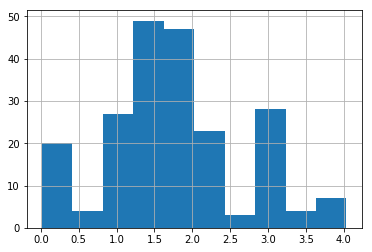

In [38]:
usageScore.hist()

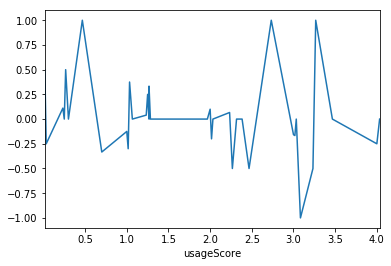

In [39]:
ls.groupby('usageScore').changeScore.mean().plot()

In [40]:
stats.spearmanr(usageScore, ls.changeScore)

SpearmanrResult(correlation=-0.10358988401686779, pvalue=0.13273036790667941)

In [41]:
## Non-significant positive correlation - although the mean graph says it all.

In [42]:
#age:

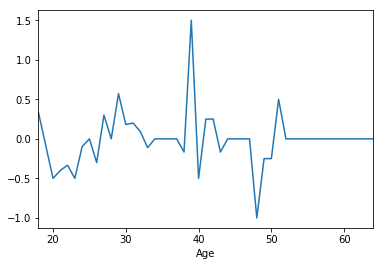

In [43]:
ls[ls.Age > 17].groupby('Age').changeScore.mean().plot()

In [44]:
ls["AgeGroups"] = pd.cut(ls[ls.Age > 17].Age, bins=[17,24,30,36,48,60,100])

In [45]:
ls.AgeGroups.value_counts()

(24, 30]     60
(36, 48]     53
(30, 36]     46
(17, 24]     28
(48, 60]     20
(60, 100]     4
Name: AgeGroups, dtype: int64

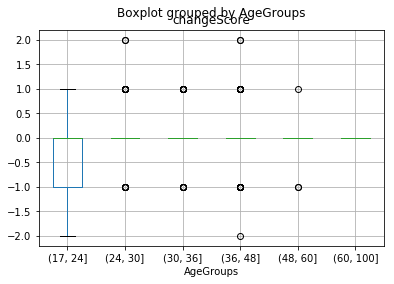

In [46]:
ls.boxplot(column="changeScore", by="AgeGroups")

In [47]:
stats.spearmanr(ls[ls.Age > 17].Age, ls[ls.Age > 17].changeScore)

SpearmanrResult(correlation=0.020916090039392026, pvalue=0.76261243988253569)